In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user

ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0)
ERROR: No matching distribution found for tensorflow==2.6.0


In [42]:
!git clone https://github.com/Jaashvitha/Pulmonary-Lung-Cancer-Detection-Using-Deep-Learning.git

fatal: destination path 'Pulmonary-Lung-Cancer-Detection-Using-Deep-Learning' already exists and is not an empty directory.


In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os  #to establish interaction btw the user and the os
import PIL #python imaging library
import numpy as np
import pathlib
import glob #used to return all file paths that match a specific pattern

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/My Drive/Data/train")

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("png"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [ ]:
data

[]

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.png')))
#print(list(directory.glob('/*.jpg')))
image_count

609

In [ ]:
#creating dictionary of lung images
lung_images_dict={
    "adenocarcinoma":list(directory.glob('adenocarcinoma/*.png')),
    "large_cell_carcinoma":list(directory.glob('large_cell_carcinoma/*.png')),
    "normal":list(directory.glob('normal/*.png')),
    "squamous_cell_carcinoma":list(directory.glob('squamous_cell_carcinoma/*.png'))


}

In [ ]:
lung_images_dict

{'adenocarcinoma': [PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000000 (6).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000005 (3).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000005 (9).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000009 (3).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000009 (7).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000008 (10).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000014 (7).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000013 (4).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000013 (8).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (10).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (4).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (9).png'),
  PosixP

In [ ]:
#Different species list
keys=["adenocarcinoma","large_cell_carcinoma","normal","squamous_cell_carcinoma"]

In [ ]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for lung_name,images in lung_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(lung_name))
lung_images_dict

completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed


{'adenocarcinoma': [PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000000 (6).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000005 (3).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000005 (9).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000009 (3).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000009 (7).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000008 (10).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000014 (7).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000013 (4).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000013 (8).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (10).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (4).png'),
  PosixPath('/content/drive/My Drive/Data/train/adenocarcinoma/000015 (9).png'),
  PosixP

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

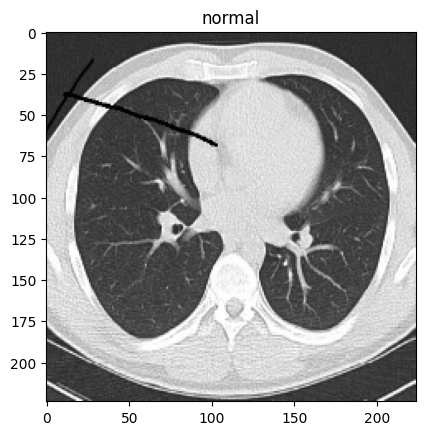

In [ ]:
print_image(x_train[15],y_train[15])

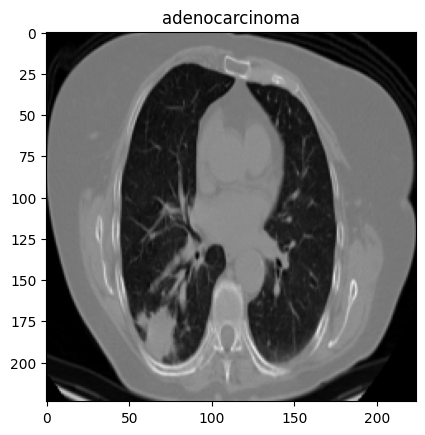

In [ ]:
print_image(x_test[6],y_test[6])

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(340, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(340,)

In [ ]:
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(200,activation="relu"),
    layers.Dense(4,activation="softmax")])
model.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train_scaled,np.array(y_train),epochs=10)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3836 - loss: 13.6037
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6356 - loss: 2.0293
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7934 - loss: 0.6654
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8783 - loss: 0.2954
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9337 - loss: 0.1408
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9973 - loss: 0.0378
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0230
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0128
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0134
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.0075


In [ ]:
model.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.9024 - loss: 0.2563


[0.24841469526290894, 0.9122806787490845]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


model1=models.Sequential([
    tf.keras.layers.RandomZoom(0.3), # Use tf.keras.layers.RandomZoom directly
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model1.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model1.fit(x_train_scaled,np.array(y_train),epochs=15)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3144 - loss: 2.9423
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4435 - loss: 1.1817
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3716 - loss: 1.1168
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5131 - loss: 0.9967
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5847 - loss: 0.9395
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6415 - loss: 0.8188
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6796 - loss: 0.7028
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6919 - loss: 0.6515
Epoch 9/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6697 - loss: 0.6575
Epoch 10/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6928 - loss: 0.6221
Epoch 11/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8151 - loss: 0.5155
Epoch 12/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7327 - lo

In [ ]:
model1.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.8894 - loss: 0.3121


[0.29691922664642334, 0.8771929740905762]

#CNN Model with only Dropout layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model3 = models.Sequential([
    keras.layers.RandomZoom(0.3),  # Use keras.layers directly for RandomZoom
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(4, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model3.fit(x_train_scaled,np.array(y_train),epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3243 - loss: 4.2694
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3379 - loss: 1.7512
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3886 - loss: 1.1645
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4750 - loss: 1.0271
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4900 - loss: 0.9363
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5130 - loss: 0.8687
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5576 - loss: 0.8531
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6490 - loss: 0.7282
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6997 - loss: 0.7010
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7603 - loss: 0.5583
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7642 - loss: 0.5321
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7840 - lo

In [ ]:
model3.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.9145 - loss: 0.3262


[0.31912240386009216, 0.9035087823867798]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model4 = models.Sequential([
    # Use tf.keras.layers directly for RandomZoom and RandomFlip
    layers.RandomZoom(0.3),
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")
])
model4.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model4.fit(x_train_scaled,np.array(y_train),epochs=8)

Epoch 1/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.2908 - loss: 10.3757
Epoch 2/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3874 - loss: 2.5592
Epoch 3/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4808 - loss: 1.1106
Epoch 4/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5181 - loss: 0.9818
Epoch 5/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6007 - loss: 0.7686
Epoch 6/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5897 - loss: 0.8540
Epoch 7/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6582 - loss: 0.6414
Epoch 8/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5972 - loss: 0.7518


In [ ]:
model4.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.6793 - loss: 0.8468


[0.8064515590667725, 0.6929824352264404]

In [ ]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Define the model
model5 = models.Sequential([
    keras.layers.RandomZoom(0.3),  # Use keras.layers.RandomZoom directly
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(4, activation="softmax")
])

# Compile the model
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model5.fit(x_train_scaled,np.array(y_train),epochs=8)

Epoch 1/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3418 - loss: 7.6605
Epoch 2/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4621 - loss: 1.4510
Epoch 3/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5517 - loss: 0.9642
Epoch 4/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6113 - loss: 0.8032
Epoch 5/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6378 - loss: 0.7231
Epoch 6/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7027 - loss: 0.6235
Epoch 7/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7578 - loss: 0.5679
Epoch 8/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7877 - loss: 0.4077


In [ ]:
model5.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.7580 - loss: 0.5879


[0.5716977119445801, 0.7543859481811523]

In [ ]:
myCNN=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(4,activation="softmax")
])
myCNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
myCNN.fit(x_train_scaled,np.array(y_train),epochs=8)

Epoch 1/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.2946 - loss: 5.0587
Epoch 2/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.7940 - loss: 0.6780
Epoch 3/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8745 - loss: 0.3188
Epoch 4/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8714 - loss: 0.2834
Epoch 5/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9310 - loss: 0.1500
Epoch 6/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9967 - loss: 0.0378
Epoch 7/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9808 - loss: 0.0560
Epoch 8/8
11/11 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9877 - loss: 0.0344


In [ ]:
myCNN.evaluate(x_test_scaled,np.array(y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - accuracy: 0.8320 - loss: 0.4100


[0.397102415561676, 0.8508771657943726]

In [ ]:
!pip install Flask
!pip install pyngrok
!pip install tensorflow
!pip install opencv-python


In [ ]:
import tensorflow as tf

# Save the model first, specifying the path:
myCNN.save('my_CNN_model.h5')  # or any desired path

# Now you can load the model
model = tf.keras.models.load_model('my_CNN_model.h5')

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from keras.models import load_model
import cv2
from pyngrok import ngrok

# Load your trained model
model = load_model('my_CNN_model.h5')  # Update with your actual model file

app = Flask(__name__)

# Define a route for the home page
@app.route('/')
def home():
    return '''
    <!DOCTYPE html>
    <html>
    <head>
        <title>CT Scan Cancer Prediction</title>
    </head>
    <body>
        <h1>Upload CT Scan Image</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*" required>
            <input type="submit" value="Predict">
        </form>
    </body>
    </html>
    '''

# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400

    file = request.files['file']

    # Preprocess the image
    img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224, 224))  # Update size if needed
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Define class labels
    classes = ["adenocarcinoma", "large_cell_carcinoma", "normal", "squamous_cell_carcinoma"]
    result = classes[predicted_class]

    return jsonify({'prediction': result})

# Set up ngrok
ngrok.set_auth_token("2n4DSHjAj880tekTNAqvLsYdGhR_Gwf7aHGG7MqPkJaCg5L3")  # Replace with your ngrok token
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")

# Run the app
app.run(port=5000)


Public URL: NgrokTunnel: "https://9ba1-34-145-181-104.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:53:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:53:48] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:54:28] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:55:00] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:56:29] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:58:14] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


INFO:werkzeug:127.0.0.1 - - [06/Oct/2024 15:58:20] "POST /predict HTTP/1.1" 200 -
